# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
#import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [3]:
N = 10 # put your index here

In [7]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print ("Реализуем алгоритм кластеризации '%s'" % my_algorithm)

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


In [31]:
10 < np.infty

True

Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [272]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.spatial.distance import cdist

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, K=2, metric='euclidean', linkage='average',  **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        """
        if metric == 'euclidean':
            self.metric = 'euclidean'
        if metric == 'manhattan':
            self.metric = 'cityblock'
        if metric == 'cosine':
            self.metric = 'cosine'
        """
        
        self.metric = metric
        
        if linkage == 'average':
            self.dist = self.average_linkage
            self.predict_dist = np.mean 
        
        if linkage == 'single':
            self.dist = self.single_linkage
            self.predict_dist = np.min
        
        if linkage == 'complete':
            self.dist = self.complete_linkage
            self.predict_dist = np.max
        
        self.K = K
        
        return
    
    def average_linkage(self, pair_dist, cluster_1, cluster_2):
        return np.mean(pair_dist[cluster_1][:, cluster_2])
    
    def single_linkage(self, pair_dist, cluster_1, cluster_2):
        return np.min(pair_dist[cluster_1][:, cluster_2])
    
    def complete_linkage(self, pair_dist, cluster_1, cluster_2):
        return np.max(pair_dist[cluster_1][:, cluster_2])
      
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.x_len = len(x)
        pair_dist = cdist(x, x, metric=self.metric)
        cluster_dist = pair_dist.copy()
        
        clusters = list()
        for i in range(self.x_len):
            clusters.append([i])
        
        C = self.x_len
        while C > self.K:
            dist_copy = cluster_dist.copy()
            dist_copy[np.triu(np.ones((C,C), dtype=bool), 1) ^ True] = np.inf
            argmin = dist_copy.argmin()
            id_i, id_j = np.unravel_index(argmin, dist_copy.shape)
            
            #argmin = (np.sort(cluster_dist) > 0).argmax()
            #id_i, id_j = np.unravel_index(argmin, cluster_dist.shape)
            
            clusters[id_i] += clusters[id_j]
            del clusters[id_j]
            ids_to_save = list(range(C))
            del ids_to_save[id_j]
            C -= 1
            #print(id_i, id_j)
            cluster_dist = cluster_dist[ids_to_save, :][:, ids_to_save]
            #fast_iter(cluster_dist, id_i, id_j, np.array(pair_dist, dtype=float), np.array(clusters, dtype=int), int(C))
            
            #cluster_dist[id_i, :] += 0.0
            #cluster_dist[:, id_i] += 0.0
            for i in range(C):
                cluster_dist[id_i, i] = cluster_dist[i, id_i] =\
                    self.average_linkage(pair_dist, clusters[id_i], clusters[i])
    
        self.clusters = list()
        for cluster in clusters:
            self.clusters.append(x[cluster])
        
        return
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        
        min_distances = np.empty(x.shape[0])
        min_distances = np.inf
        predicted = np.zeros(x.shape[0])
        for i, cluster in enumerate(self.clusters):
            distances = self.predict_dist(cdist(x, cluster, metric=self.metric), axis=1)
            predicted = np.where(min_distances > distances, i, predicted)
            min_distances = np.where(min_distances > distances, distances, min_distances)
            
        
        return np.array(predicted, dtype=int)
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

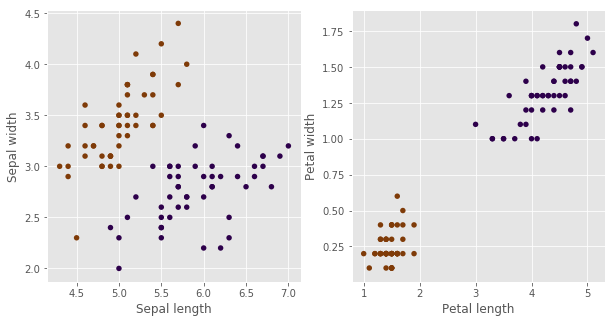

In [47]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [72]:
pred_iris = Clustering(K=2,metric='manhattan', linkage='complete').fit_predict(x_iris)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


In [305]:
%%timeit
X = linkage(x_iris, method='average', metric='euclidean')
X = None

1000 loops, best of 3: 250 µs per loop


In [299]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.cluster.hierarchy import fcluster, cophenet



Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [64]:
## Задание 2
def quality(x, y, metric='euclidean'):
    pair_dist = cdist(x, x, metric=metric)
    s = np.empty(x.shape[0])
    for i in range(x.shape[0]):
        a_i = np.mean(pair_dist[i, :][y == y[i]])
        b_distances = list()
        for label in y[y != y[i]]:
            b_distances.append(np.mean(pair_dist[i, :][y == label]))
        b_i = min(b_distances)
        s[i] = (b_i - a_i) / max(a_i, b_i)
        
    
    return s.mean()

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

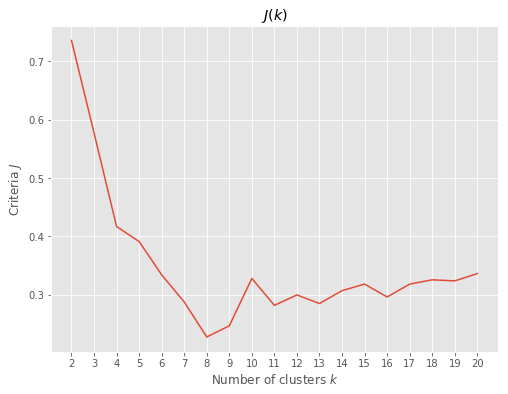

In [75]:
ks = range(2, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(K=k, linkage='complete')
    y = cls.fit_predict(x_iris)
    criteria[i] = quality(x_iris, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.xticks(ks)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.show()

In [626]:
## Задание 3

import pandas as pd


In [627]:
df = pd.DataFrame.from_csv("./WDI_csv/WDIData.csv")
df.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN,NaN


In [628]:
cnt_nans = dict()
for i in range(1960, 2018):
    cnt_nans[i] = np.sum(df.loc[:, str(i)] == df.loc[:, str(i)])

In [629]:
max_year = np.argmax(list(cnt_nans.values())) + 1960
max_year, cnt_nans[max_year]

(2010, 236938)

In [630]:
df = df.loc[:, ['Country Code', 'Indicator Name', 'Indicator Code', '2010']]
df = df.reset_index()
df.columns = ['Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code', 'Y2010']
df.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,Y2010
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,82.407647
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,86.136134
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,74.507470


In [434]:
info_Names = list()
ind_names = np.unique(df.Indicator_Name)
for name in tqdm(ind_names):
    curr_df = df[df.Indicator_Name == name]
    if np.sum(curr_df.Y2010 == curr_df.Y2010) >= 250:
        info_Names.append(name)

100%|██████████| 1591/1591 [01:31<00:00, 17.46it/s]


In [631]:
len(info_Names)

40

In [632]:
mask = np.zeros(df.shape[0], dtype=bool)
for name in info_Names:
    mask = mask | np.array(df.Indicator_Name == name)

In [633]:
df = df[mask]

In [636]:
few_info_countries = list()
countries = np.unique(df.Country_Name)
for country in countries:
    curr_df = df[df.Country_Name == country]
    if np.sum(curr_df.Y2010 == curr_df.Y2010) < 40: 
        few_info_countries.append((country, np.sum(curr_df.Y2010 == curr_df.Y2010)))

In [637]:
few_info_countries

[('American Samoa', 35),
 ('Andorra', 37),
 ('Bermuda', 39),
 ('British Virgin Islands', 36),
 ('Cayman Islands', 39),
 ('Central African Republic', 38),
 ('Chad', 38),
 ('Channel Islands', 28),
 ('Curacao', 27),
 ('Eritrea', 38),
 ('Faroe Islands', 39),
 ('French Polynesia', 39),
 ('Gibraltar', 31),
 ('Greenland', 39),
 ('Guam', 37),
 ('Hong Kong SAR, China', 37),
 ('Isle of Man', 27),
 ('Korea, Dem. People’s Rep.', 38),
 ('Kosovo', 17),
 ('Liechtenstein', 35),
 ('Luxembourg', 38),
 ('Macao SAR, China', 31),
 ('Marshall Islands', 34),
 ('Monaco', 26),
 ('Montenegro', 39),
 ('Nauru', 33),
 ('Northern Mariana Islands', 35),
 ('Not classified', 0),
 ('Pacific island small states', 39),
 ('San Marino', 33),
 ('Singapore', 39),
 ('Sint Maarten (Dutch part)', 20),
 ('South Sudan', 19),
 ('St. Kitts and Nevis', 38),
 ('St. Martin (French part)', 13),
 ('Turks and Caicos Islands', 36),
 ('Tuvalu', 34),
 ('Virgin Islands (U.S.)', 38),
 ('West Bank and Gaza', 37)]

In [638]:
for pair in few_info_countries:
    if pair[1] < 35:
        df = df[df.Country_Name != pair[0]]

In [644]:
few_info_countries = list()
countries = np.unique(df.Country_Name)
for country in countries:
    curr_df = df[df.Country_Name == country]
    if np.sum(curr_df.Y2010 == curr_df.Y2010) < 40: 
        few_info_countries.append((country, np.sum(curr_df.Y2010 == curr_df.Y2010)))

In [645]:
for pair in few_info_countries:
    curr_df = df[df.Country_Name == pair[0]]
    print(pair[0])
    print(list(curr_df[True^(curr_df.Y2010 == curr_df.Y2010)].Indicator_Name))

American Samoa
['Access to electricity (% of population)', 'Access to electricity, urban (% of urban population)', 'Death rate, crude (per 1,000 people)', 'Mobile cellular subscriptions', 'Mobile cellular subscriptions (per 100 people)']
Andorra
['Capture fisheries production (metric tons)', 'Methane emissions (kt of CO2 equivalent)', 'Total fisheries production (metric tons)']
Bermuda
['Rural population growth (annual %)']
British Virgin Islands
['Access to electricity (% of population)', 'Access to electricity, urban (% of urban population)', 'Birth rate, crude (per 1,000 people)', 'Death rate, crude (per 1,000 people)']
Cayman Islands
['Rural population growth (annual %)']
Central African Republic
['Secure Internet servers', 'Secure Internet servers (per 1 million people)']
Chad
['Secure Internet servers', 'Secure Internet servers (per 1 million people)']
Eritrea
['Secure Internet servers', 'Secure Internet servers (per 1 million people)']
Faroe Islands
['Primary education, duration

In [646]:
birth = 'Birth rate, crude (per 1,000 people)'
death = 'Death rate, crude (per 1,000 people)'
for pair in few_info_countries:
    curr_df = df[df.Country_Name == pair[0]]
    nan_indexes = list(curr_df[True^(curr_df.Y2010 == curr_df.Y2010)].Indicator_Name)
    if (birth in nan_indexes) or (death in nan_indexes):
            df = df[df.Country_Name != pair[0]]

In [647]:
few_info_countries = list()
countries = np.unique(df.Country_Name)
for country in countries:
    curr_df = df[df.Country_Name == country]
    if np.sum(curr_df.Y2010 == curr_df.Y2010) < 40: 
        few_info_countries.append((country, np.sum(curr_df.Y2010 == curr_df.Y2010)))

In [650]:
for pair in few_info_countries:
    curr_df = df[df.Country_Name == pair[0]]
    print(pair[0])
    print(list(curr_df[True^(curr_df.Y2010 == curr_df.Y2010)].Indicator_Name))

Andorra
['Capture fisheries production (metric tons)', 'Methane emissions (kt of CO2 equivalent)', 'Total fisheries production (metric tons)']
Bermuda
['Rural population growth (annual %)']
Cayman Islands
['Rural population growth (annual %)']
Central African Republic
['Secure Internet servers', 'Secure Internet servers (per 1 million people)']
Chad
['Secure Internet servers', 'Secure Internet servers (per 1 million people)']
Eritrea
['Secure Internet servers', 'Secure Internet servers (per 1 million people)']
Faroe Islands
['Primary education, duration (years)']
French Polynesia
['Primary education, duration (years)']
Greenland
['Primary education, duration (years)']
Guam
['Mobile cellular subscriptions', 'Mobile cellular subscriptions (per 100 people)', 'Primary education, duration (years)']
Hong Kong SAR, China
['Forest area (% of land area)', 'Forest area (sq. km)', 'Rural population growth (annual %)']
Korea, Dem. People’s Rep.
['Secure Internet servers', 'Secure Internet servers 

In [651]:
df.fillna(0,inplace=True)

In [652]:
df_ = df.loc[:, ['Country_Name', 'Indicator_Name', 'Y2010']]
df_ = df_.pivot(index='Country_Name', columns='Indicator_Name', values='Y2010')
df = df_
df.head()

Indicator_Name,Access to electricity (% of population),"Access to electricity, urban (% of urban population)",Agricultural land (% of land area),Agricultural land (sq. km),Arable land (% of land area),Arable land (hectares per person),"Birth rate, crude (per 1,000 people)",Capture fisheries production (metric tons),"Death rate, crude (per 1,000 people)",Fixed telephone subscriptions,...,Rural population,Rural population (% of total population),Rural population growth (annual %),Secure Internet servers,Secure Internet servers (per 1 million people),Surface area (sq. km),Total fisheries production (metric tons),Urban population,Urban population (% of total),Urban population growth (annual %)
Country_Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,42.700000,82.800000,58.069111,379110.0,11.936709,0.270561,39.232,1000.0,8.095,16620.0,...,21691953.0,75.311,2.314596,20.0,0.694368,652860.0,2050.000,7111214.0,24.689,4.347280
Albania,100.000000,100.000000,43.843066,12013.0,22.846715,0.214897,11.819,5132.2,6.776,333066.0,...,1393502.0,47.837,-2.743291,27.0,9.268728,28750.0,7636.200,1519519.0,52.163,1.609373
Algeria,98.884972,99.505684,17.371334,413740.0,3.149798,0.207710,24.762,93463.0,4.754,2922731.0,...,11728841.0,32.474,-0.323370,31.0,0.858306,2381740.0,95221.742,24388796.0,67.526,2.869395
Andorra,100.000000,100.000000,42.063830,197.7,1.638298,0.009118,9.800,0.0,2.800,38171.0,...,10288.0,12.183,4.472573,78.0,923.634383,470.0,0.000,74161.0,87.817,-0.622377
Angola,33.514950,59.367783,46.835646,583900.0,3.288682,0.175445,45.314,310000.0,10.450,281122.0,...,13998811.0,59.903,2.246740,52.0,2.225158,1246700.0,310310.000,9370320.0,40.097,5.580344


In [500]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df.values)

5it [00:07,  1.48s/it]


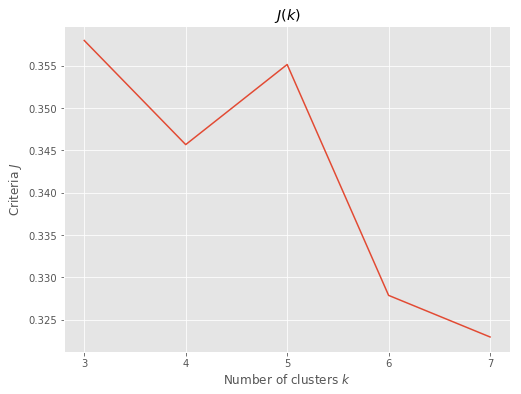

In [653]:
ks = range(3, 8)
criteria = np.zeros(len(ks))

for i, k in tqdm(enumerate(ks)):
    cls = Clustering(K=k, metric='correlation', linkage='average')
    y = cls.fit_predict(x)
    criteria[i] = quality(x, y, metric='correlation')
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.xticks(ks)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.show()

In [ ]:
cls = Clustering(K=5, metric='correlation', linkage='average')
y = cls.fit_predict(x)

In [655]:
df.iloc[y==0].index

Index(['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Fragile and conflict affected situations', 'Gambia, The', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti',
       'Heavily indebted poor countries (HIPC)', 'IDA blend', 'IDA only',
       'IDA total', 'India', 'Kenya', 'Kiribati', 'Lao PDR',
       'Least developed countries: UN classification', 'Lesotho', 'Liberia',
       'Low income', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria',
       'Other small states', 'Pakistan', 'Papua New Guinea',
       'Pre-demographic dividend', 'Rwanda', 'Sao Tome and Principe',
       'Senegal', 'Sierra Leone', 'Small states', 'Solomon Islands', 'Somalia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (

In [656]:
df.iloc[y==1].index

Index(['Albania', 'Belize', 'Bhutan', 'Bolivia', 'Brazil', 'Brunei Darussalam',
       'Cabo Verde', 'Caribbean small states', 'Chile', 'Colombia',
       'Costa Rica', 'Ecuador', 'Fiji', 'Gabon', 'Guatemala', 'Guyana',
       'Honduras', 'Indonesia', 'Malaysia', 'Mexico', 'Nicaragua', 'Norway',
       'Panama', 'Paraguay', 'Peru', 'Samoa', 'Seychelles', 'Sri Lanka',
       'Suriname', 'Venezuela, RB', 'Vietnam'],
      dtype='object', name='Country_Name')

In [657]:
df.iloc[y==2].index

Index(['Algeria', 'Arab World', 'Azerbaijan', 'Bahrain', 'Egypt, Arab Rep.',
       'Faroe Islands', 'French Polynesia', 'Greenland', 'Guam',
       'Iran, Islamic Rep.', 'Iraq', 'Israel', 'Jordan', 'Kuwait',
       'Kyrgyz Republic', 'Lebanon', 'Libya', 'Maldives',
       'Middle East & North Africa',
       'Middle East & North Africa (IDA & IBRD countries)',
       'Middle East & North Africa (excluding high income)', 'New Caledonia',
       'Oman', 'Philippines', 'Qatar', 'Singapore', 'Tajikistan',
       'Turkmenistan', 'United Arab Emirates', 'Uzbekistan',
       'West Bank and Gaza'],
      dtype='object', name='Country_Name')

In [658]:
df.iloc[y==3].index

Index(['Andorra', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Bahamas, The', 'Barbados', 'Belarus',
       'Belgium', 'Bermuda', 'Bosnia and Herzegovina', 'Bulgaria', 'Canada',
       'Cayman Islands', 'Central Europe and the Baltics', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic',
       'El Salvador', 'Estonia', 'Euro area', 'European Union', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Korea, Rep.', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malta', 'Mauritius',
       'Moldova', 'Montenegro', 'Netherlands', 'New Zealand', 'North America',
       'Palau', 'Poland', 'Portugal', 'Puerto Rico', 'Romania',
       'Russian Federation', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain',
       'St. Lucia', 'St. Vincent and the Grenadi

In [659]:
df.iloc[y==4].index

Index(['China', 'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Europe & Central Asia',
       'Europe & Central Asia (IDA & IBRD countries)',
       'Europe & Central Asia (excluding high income)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Low & middle income', 'Lower middle income', 'Middle income',
       'OECD members', 'Post-demographic dividend', 'South Asia',
       'South Asia (IDA & IBRD)', 'Upper middle income', 'World'],
      dtype='object', name='Country_Name')

In [660]:
from sklearn.manifold import TSNE

In [664]:
x_tsne = TSNE(n_components=2, metric='correlation').fit_transform(x)

In [665]:
countries = list(df.index)

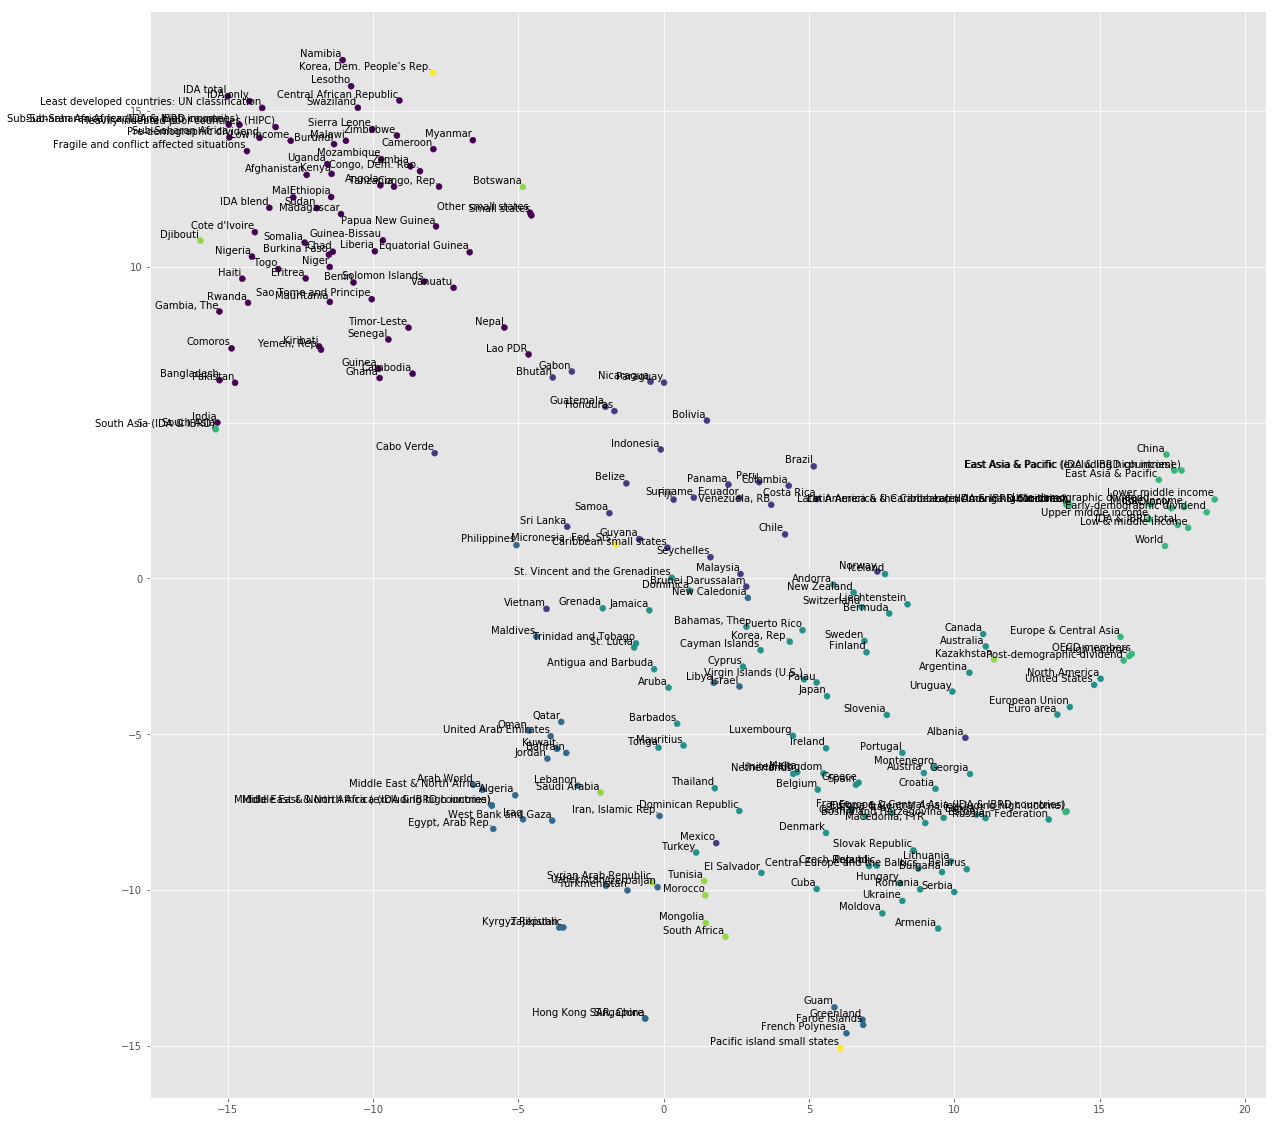

In [666]:
pl.figure(figsize=(20, 20))
pl.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
for label, i, j in zip(countries, x_tsne[:, 0], x_tsne[:, 1]):
    pl.annotate(
        label,
        xy=(i, j), xytext=(-1, 1),
        textcoords='offset points', ha='right', va='bottom',
      #  arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

pl.show()

In [231]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.cluster.hierarchy import fcluster, cophenet

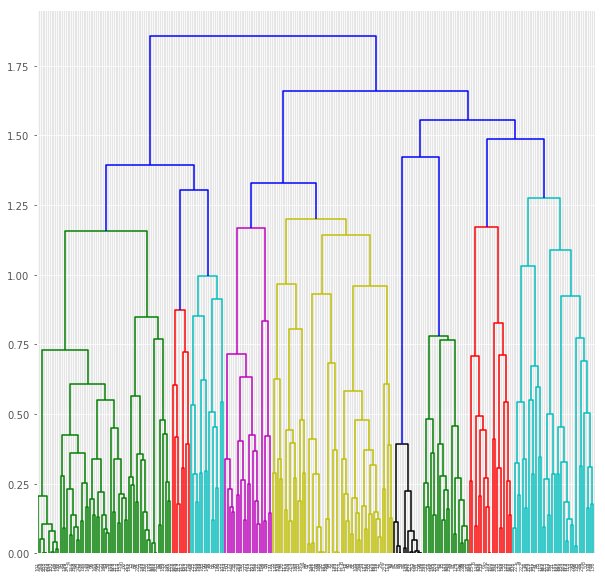

In [237]:

Z = linkage(x, method='complete', metric='cosine')
pl.figure(figsize=(10, 10))
dend = dendrogram(Z)

In [206]:
for pair in bad:
    curr_df = df[df.Country_Name == pair[0]]
    if 'Death rate, crude (per 1,000 people)' in\
        list(curr_df[True^(curr_df.Y2010 == curr_df.Y2010)].Indicator_Name):
            df = df[df.Country_Name != pair[0]]

[('American Samoa', 35),
 ('Andorra', 37),
 ('Bermuda', 39),
 ('British Virgin Islands', 36),
 ('Cayman Islands', 39),
 ('Central African Republic', 38),
 ('Chad', 38),
 ('Eritrea', 38),
 ('Faroe Islands', 39),
 ('French Polynesia', 39),
 ('Greenland', 39),
 ('Guam', 37),
 ('Hong Kong SAR, China', 37),
 ('Korea, Dem. People’s Rep.', 38),
 ('Liechtenstein', 35),
 ('Luxembourg', 38),
 ('Montenegro', 39),
 ('Northern Mariana Islands', 35),
 ('Pacific island small states', 39),
 ('Singapore', 39),
 ('St. Kitts and Nevis', 38),
 ('Turks and Caicos Islands', 36),
 ('Virgin Islands (U.S.)', 38),
 ('West Bank and Gaza', 37)]

In [181]:
bad[0][0]

'American Samoa'

In [ ]:
## Задание 4

In [132]:
262 - 47

215

In [145]:
264 / 25

10.56

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.